In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_encoded = pd.read_csv(r'C:\Users\raclo\Documents\Bootcamp\tour-de-france-project\data\TDF_full_ranking_2014_2024_encoded.csv')   

In [3]:
# Lits all columns names
df_encoded.columns.tolist()

['year_edition',
 'rider_name',
 'team',
 'bib_number',
 'nationality',
 'birthdate',
 'height',
 'weight',
 'speciality_one_day_races',
 'speciality_gc',
 'speciality_time_trial',
 'speciality_sprint',
 'speciality_climber',
 'speciality_hills',
 'age',
 'bmi',
 'name_clean',
 'rank',
 'nat_AR',
 'nat_AT',
 'nat_AU',
 'nat_BE',
 'nat_CA',
 'nat_CH',
 'nat_CO',
 'nat_CZ',
 'nat_DE',
 'nat_DK',
 'nat_EE',
 'nat_ER',
 'nat_ES',
 'nat_FR',
 'nat_GB',
 'nat_HR',
 'nat_IE',
 'nat_IT',
 'nat_KZ',
 'nat_LT',
 'nat_LU',
 'nat_LV',
 'nat_NL',
 'nat_NO',
 'nat_NZ',
 'nat_Other',
 'nat_PL',
 'nat_PT',
 'nat_RU',
 'nat_SI',
 'nat_SK',
 'nat_US',
 'nat_ZA',
 'climber_cat',
 'speciality_climber_cat',
 'speciality_gc_cat',
 'speciality_sprint_cat',
 'speciality_time_trial_cat',
 'speciality_one_day_races_cat',
 'speciality_hills_cat',
 'speciality_gc_cat_num',
 'speciality_climber_cat_num',
 'speciality_time_trial_cat_num',
 'age_group',
 'age_group_adj',
 'rank_group']

In [4]:
# The list of specific columns you want to drop
manual_columns_to_drop = [
    'name_clean', 'birthdate', 'climber_cat', 'speciality_climber_cat',
    'speciality_gc_cat', 'speciality_sprint_cat', 'speciality_time_trial_cat',
    'speciality_one_day_races_cat', 'speciality_hills_cat',
    'speciality_gc_cat_num', 'speciality_climber_cat_num',
    'speciality_time_trial_cat_num', 'age_group_adj', 'rank_group', 'age_group'
]

# Find all columns that are one-hot encoded for nationality
nationality_columns_to_drop = [col for col in df_encoded.columns if col.startswith('nat_')]

# Combine the two lists into a final list of all columns to drop
all_columns_to_drop = manual_columns_to_drop + nationality_columns_to_drop

# Drop the columns from the dataframe
# errors='ignore' prevents an error if a column in the list has already been removed
df_cleaned = df_encoded.drop(columns=all_columns_to_drop, errors='ignore')

# Display the first few rows and the new shape to confirm the changes
print("DataFrame after dropping specified and nationality columns:")
print(df_cleaned.head())
print(f"\nOriginal number of columns: {df_encoded.shape[1]}")
print(f"Number of columns dropped: {len(all_columns_to_drop)}")
print(f"New number of columns: {df_cleaned.shape[1]}")

DataFrame after dropping specified and nationality columns:
   year_edition       rider_name           team  bib_number nationality  \
0          2014   EISEL Bernhard  Team Sky (WT)           2          AT   
1          2014  KIRYIENKA Vasil  Team Sky (WT)           3          BY   
2          2014      LÓPEZ David  Team Sky (WT)           4          ES   
3          2014      NIEVE Mikel  Team Sky (WT)           5          ES   
4          2014       PATE Danny  Team Sky (WT)           6          US   

   height  weight  speciality_one_day_races  speciality_gc  \
0    1.83    74.0                      2277           1126   
1    1.82    69.0                       506           1537   
2    1.79    68.0                       659           2028   
3    1.73    62.0                       811           3608   
4    1.85    73.0                       392            602   

   speciality_time_trial  speciality_sprint  speciality_climber  \
0                    268                684      

In [5]:
df_cleaned.to_csv(r'C:\Users\raclo\Documents\Bootcamp\tour-de-france-project\data\TDF_full_ranking_2014_2024_cleaned.csv', index=False) 

In [6]:
df_cleaned.head()

,year_edition,rider_name,team,bib_number,nationality,height,weight,speciality_one_day_races,speciality_gc,speciality_time_trial,speciality_sprint,speciality_climber,speciality_hills,age,bmi,rank
0,2014,EISEL Bernhard,Team Sky (WT),2,AT,1.83,74.0,2277,1126,268,684,102,541,33,22.096808,114.0
1,2014,KIRYIENKA Vasil,Team Sky (WT),3,BY,1.82,69.0,506,1537,4521,29,1288,608,33,20.830818,112.0
2,2014,LÓPEZ David,Team Sky (WT),4,ES,1.79,68.0,659,2028,264,1,939,476,33,21.222808,111.0
3,2014,NIEVE Mikel,Team Sky (WT),5,ES,1.73,62.0,811,3608,31,0,4074,486,30,20.715694,18.0
4,2014,PATE Danny,Team Sky (WT),6,US,1.85,73.0,392,602,926,0,126,25,35,21.329438,113.0


In [7]:
# Add experience feature
# This is a great way to calculate experience. It's clean and fast.
# Step 1: Sorting ensures cumcount works correctly across years
df_cleaned = df_cleaned.sort_values(by=['rider_name', 'year_edition'])

# Step 2: cumcount() counts the number of previous entries for each rider
# This correctly represents the number of prior participations (experience).
df_cleaned['experience'] = df_cleaned.groupby('rider_name').cumcount()

print("Successfully added 'experience' feature:")
print(df_cleaned[['rider_name', 'year_edition', 'experience']].head())

Successfully added 'experience' feature:
              rider_name  year_edition  experience
1296    ABRAHAMSEN Jonas          2023           0
52        ACEVEDO Janier          2014           0
401   ALAPHILIPPE Julian          2016           0
628   ALAPHILIPPE Julian          2018           1
703   ALAPHILIPPE Julian          2019           2


In [8]:
# Add team_median_rank: the non-leaky approach
# Calculate last year's median rank for each team
team_median_last_year = df_cleaned.groupby(['year_edition', 'team'])['rank'].median().reset_index()

# Rename the column for clarity
team_median_last_year.rename(columns={'rank': 'team_median_rank_last_year'}, inplace=True)

# This is the key step: It lags the data by one year.
# The 2023 median rank is now assigned to the year 2024, and so on.
team_median_last_year['year_edition'] = team_median_last_year['year_edition'] + 1

# Merge this lagged feature back into your main dataframe
df_cleaned = df_cleaned.merge(team_median_last_year, on=['year_edition', 'team'], how='left')

# IMPORTANT: Handle NaNs for the first year (2014) or for new teams
# We can fill these with the overall median of the new feature
overall_median_rank = df_cleaned['team_median_rank_last_year'].median()
df_cleaned['team_median_rank_last_year'].fillna(overall_median_rank, inplace=True)

print("\nSuccessfully added 'team_median_rank_last_year' feature.")


Successfully added 'team_median_rank_last_year' feature.


C:\Users\raclo\AppData\Local\Temp\ipykernel_8576\70762049.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['team_median_rank_last_year'].fillna(overall_median_rank, inplace=True)


In [9]:
df_cleaned.head()

,year_edition,rider_name,team,bib_number,nationality,height,weight,speciality_one_day_races,speciality_gc,speciality_time_trial,speciality_sprint,speciality_climber,speciality_hills,age,bmi,rank,experience,team_median_rank_last_year
0,2023,ABRAHAMSEN Jonas,Uno-X Pro Cycling Team (PRT),202,NO,1.83,78.0,677,149,11,292,86,242,27,23.291230,77.0,0,71.0
1,2014,ACEVEDO Janier,Garmin Sharp (WT),92,CO,1.75,63.0,91,582,212,6,304,166,28,20.571429,138.0,0,71.0
2,2016,ALAPHILIPPE Julian,Etixx - Quick Step (WT),182,FR,1.73,62.0,6670,2738,1430,774,5331,4658,24,20.715694,39.0,0,93.0
3,2018,ALAPHILIPPE Julian,Quick-Step Floors (WT),101,FR,1.73,62.0,6670,2738,1430,774,5331,4658,26,20.715694,30.0,1,78.5
4,2019,ALAPHILIPPE Julian,Deceuninck - Quick Step (WT),21,FR,1.73,62.0,6670,2738,1430,774,5331,4658,27,20.715694,5.0,2,71.0


In [10]:
# Group nationalities into top countries and regions + dropping non-numeric identifiers
import numpy as np
import pandas as pd

# Assume df_cleaned is your dataframe after initial cleaning but before this step

# --- Group nationalities into top countries and regions ---
top_countries = ['FR', 'ES', 'BE', 'NL', 'IT', 'CO', 'SI', 'DK', 'DE', 'GB', 'US']
region_map = {
    'PT': 'Southern Europe', 'BY': 'Eastern Europe', 'CH': 'Western Europe',
    'PL': 'Eastern Europe', 'AU': 'Oceania', 'EC': 'South America',
    'AT': 'Central Europe', 'LU': 'Western Europe', 'KZ': 'Central Asia',
    'EE': 'Baltic', 'IE': 'Western Europe', 'CA': 'North America',
    'CZ': 'Central Europe', 'SK': 'Central Europe', 'NO': 'Nordic',
    'ER': 'Africa', 'ZA': 'Africa', 'CR': 'Central America',
    'ET': 'Africa', 'HR': 'Balkan', 'JP': 'Asia', 'LV': 'Baltic',
    'NZ': 'Oceania', 'IL': 'Middle East', 'AR': 'South America',
    'LT': 'Baltic', 'RU': 'Eastern Europe', 'SE': 'Nordic', 'CN': 'Asia'
}

conditions = [
    df_cleaned['nationality'].isin(top_countries),
    df_cleaned['nationality'].isin(region_map.keys())
]
choices = [
    df_cleaned['nationality'],
    df_cleaned['nationality'].map(region_map)
]
df_cleaned['nationality_group'] = np.select(conditions, choices, default='Other')

nationality_dummies = pd.get_dummies(df_cleaned['nationality_group'], prefix='nat', dtype=int)

# --- Final Assembly ---
# Combine the cleaned data with the new dummy columns
df_final = pd.concat([df_cleaned, nationality_dummies], axis=1)


# --- FINAL CLEANUP (FIX IS HERE) ---
# Now, create a final list of all columns used for engineering that are no longer needed.
# This includes the original text columns and the intermediate group column.
final_columns_to_drop = [
    'nationality',
    'nationality_group',
    'rider_name',          # Drop non-numeric identifier
    'team'                 # Drop non-numeric identifier
]

# Drop all of these columns at once to create the final, purely numerical dataframe
df_final.drop(columns=final_columns_to_drop, inplace=True, errors='ignore')

print("Final dataframe is ready for modeling.")
print("Remaining columns:", df_final.columns.tolist())

Final dataframe is ready for modeling.
Remaining columns: ['year_edition', 'bib_number', 'height', 'weight', 'speciality_one_day_races', 'speciality_gc', 'speciality_time_trial', 'speciality_sprint', 'speciality_climber', 'speciality_hills', 'age', 'bmi', 'rank', 'experience', 'team_median_rank_last_year', 'nat_Africa', 'nat_Asia', 'nat_BE', 'nat_Balkan', 'nat_Baltic', 'nat_CO', 'nat_Central America', 'nat_Central Asia', 'nat_Central Europe', 'nat_DE', 'nat_DK', 'nat_ES', 'nat_Eastern Europe', 'nat_FR', 'nat_GB', 'nat_IT', 'nat_Middle East', 'nat_NL', 'nat_Nordic', 'nat_North America', 'nat_Oceania', 'nat_SI', 'nat_South America', 'nat_Southern Europe', 'nat_US', 'nat_Western Europe']


In [11]:
df_final.head()

,year_edition,bib_number,height,weight,speciality_one_day_races,speciality_gc,speciality_time_trial,speciality_sprint,speciality_climber,speciality_hills,...,nat_Middle East,nat_NL,nat_Nordic,nat_North America,nat_Oceania,nat_SI,nat_South America,nat_Southern Europe,nat_US,nat_Western Europe
0,2023,202,1.83,78.0,677,149,11,292,86,242,...,0,0,1,0,0,0,0,0,0,0
1,2014,92,1.75,63.0,91,582,212,6,304,166,...,0,0,0,0,0,0,0,0,0,0
2,2016,182,1.73,62.0,6670,2738,1430,774,5331,4658,...,0,0,0,0,0,0,0,0,0,0
3,2018,101,1.73,62.0,6670,2738,1430,774,5331,4658,...,0,0,0,0,0,0,0,0,0,0
4,2019,21,1.73,62.0,6670,2738,1430,774,5331,4658,...,0,0,0,0,0,0,0,0,0,0


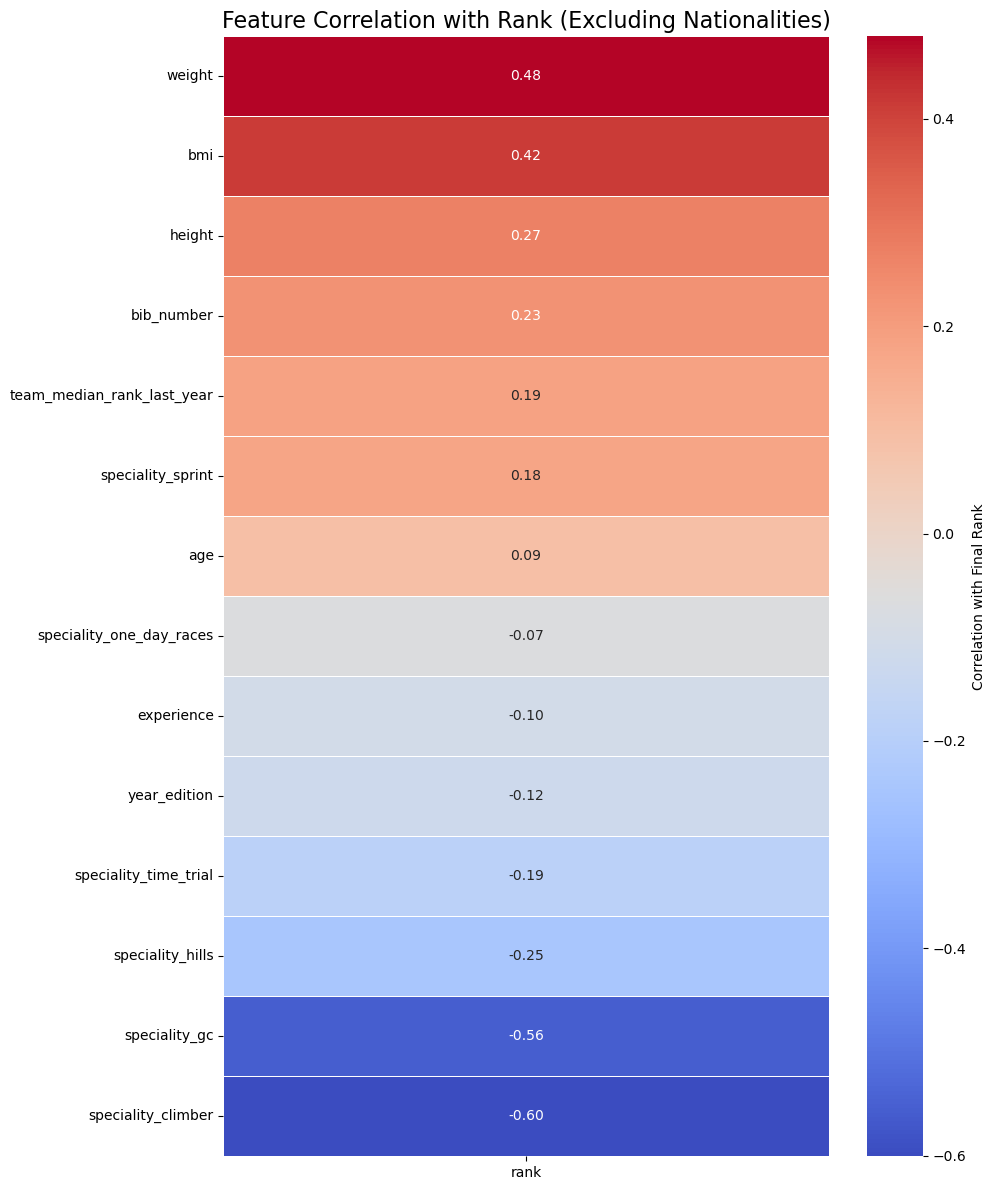

In [12]:
# Correlation heatmap
# Create a list of the one-hot encoded nationality columns
nat_columns_to_exclude = [col for col in df_final.columns if col.startswith('nat_')]

# Create a new dataframe without the nationality columns for this specific plot
df_no_nat = df_final.drop(columns=nat_columns_to_exclude)

# Now, create the correlation heatmap as before, but on this smaller dataframe
# This will produce a column heatmap showing correlation with 'rank'
corr_matrix_no_nat = df_no_nat.corr(numeric_only=True)
target_corr_no_nat = corr_matrix_no_nat[['rank']].drop('rank').sort_values(by='rank', ascending=False)

plt.figure(figsize=(10, 12))
sns.heatmap(
    target_corr_no_nat,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=.5,
    cbar_kws={'label': 'Correlation with Final Rank'}
)
plt.title('Feature Correlation with Rank (Excluding Nationalities)', fontsize=16)
plt.tight_layout()
plt.show()

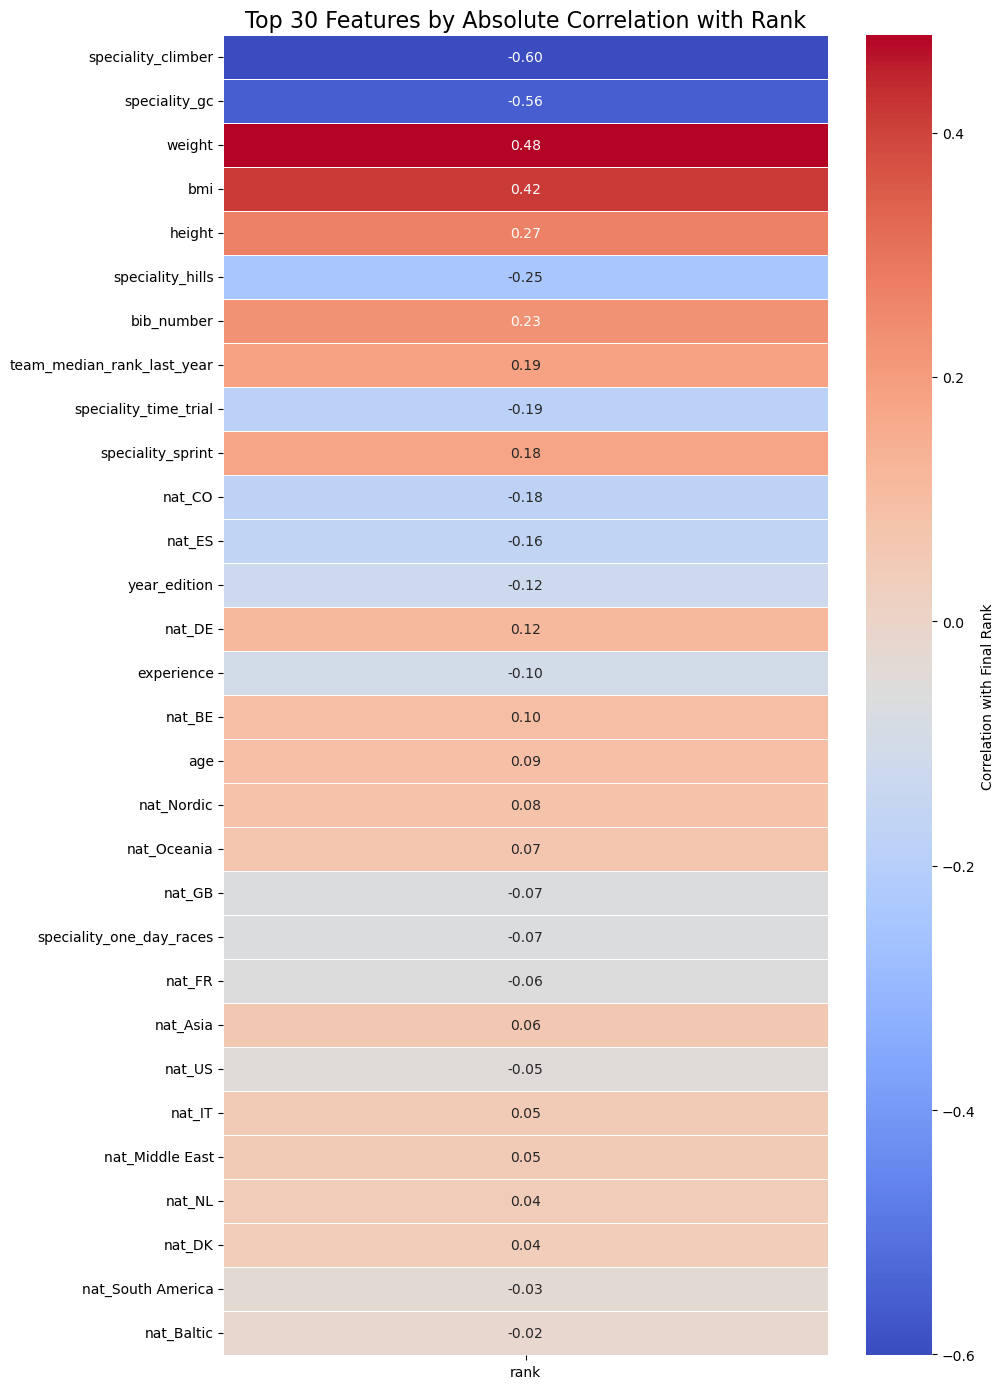

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Start with your final, fully-featured dataframe
df_to_plot = df_final.copy()

# Step 1: Calculate the correlation matrix for all numeric columns
corr_matrix = df_to_plot.corr(numeric_only=True)

# Step 2: Isolate the correlations with the target variable 'rank'
target_corr = corr_matrix[['rank']].drop('rank') # Drop the rank's correlation with itself

# Step 3: Create a new column with the absolute value of the correlation
# This is the key to sorting by strength
target_corr['abs_corr'] = target_corr['rank'].abs()

# Step 4: Sort the features by the absolute correlation values, from strongest to weakest
target_corr_sorted = target_corr.sort_values(by='abs_corr', ascending=False)

# Step 5: Drop the temporary absolute value column as it's not needed for the plot
target_corr_sorted = target_corr_sorted.drop(columns=['abs_corr'])

# Step 6: Create the column heatmap with the new sorting
# We'll limit to the top 30 for readability, you can adjust this
plt.figure(figsize=(10, 14))
sns.heatmap(
    target_corr_sorted.head(30), # Plotting the top 30 strongest features
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=.5,
    cbar_kws={'label': 'Correlation with Final Rank'}
)
plt.title('Top 30 Features by Absolute Correlation with Rank', fontsize=16)
plt.tight_layout()
plt.show()

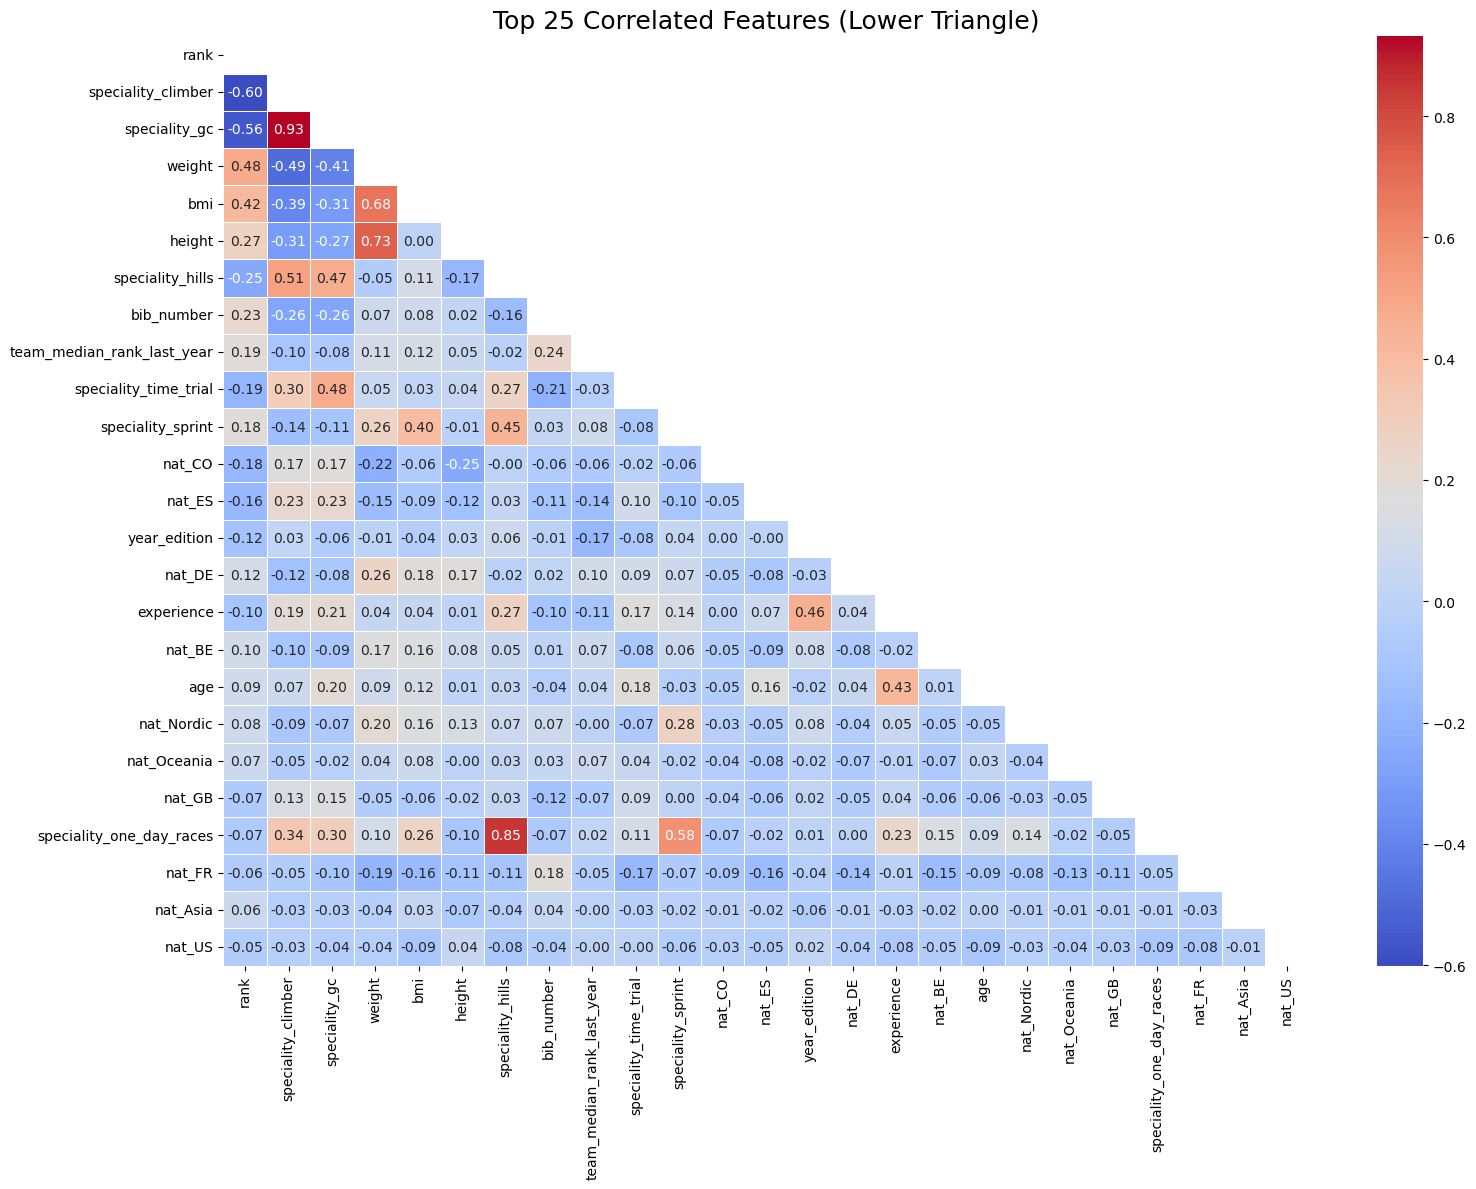

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# We assume your final, fully-featured dataframe is df_final
df_for_corr = df_final

# Step 1: Calculate the correlation matrix and find the top features
# (This part is the same as before)
corr_matrix = df_for_corr.corr(numeric_only=True)
abs_corr_with_target = corr_matrix['rank'].abs().sort_values(ascending=False)
top_n = 25
top_features = abs_corr_with_target.head(top_n).index
top_features_corr_matrix = corr_matrix.loc[top_features, top_features]


# Step 2: Create the mask for the upper triangle
# np.triu creates a mask for the upper triangle (including the diagonal)
# np.ones_like creates a matrix of all 'True' values with the same shape as our data
mask = np.triu(np.ones_like(top_features_corr_matrix, dtype=bool))


# Step 3: Create the heatmap, now with the mask applied
plt.figure(figsize=(16, 12))
sns.heatmap(
    top_features_corr_matrix,
    mask=mask,           # This is the new parameter that applies the mask
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=.5
)
plt.title(f'Top {top_n} Correlated Features (Lower Triangle)', fontsize=18)
plt.tight_layout()
plt.show()

In [15]:
# Perform a time-based split
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error

# Your final dataframe from all the feature engineering steps
# Assumes it's called df_final
final_df = df_final.copy()

# Define your target variable and features
TARGET = 'rank'
FEATURES = [col for col in final_df.columns if col != TARGET]

X = final_df[FEATURES]
y = final_df[TARGET]

# Create the time-based split
X_train = X[X['year_edition'] < 2024]
X_test = X[X['year_edition'] == 2024]
y_train = y[X_train.index]
y_test = y[X_test.index]

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape:  {X_test.shape}")

Training data shape: (1307, 40)
Testing data shape:  (100, 40)


In [16]:
# Define feature sets
# Define the different feature sets you want to compare
feature_sets = {
    "full_set": X_train.columns.tolist(),

    "no_specialities": [col for col in X_train.columns if not col.startswith('speciality_')],

    "no_bib_number": [col for col in X_train.columns if col != 'bib_number'],

    "core_physical_and_team": ['age', 'bmi', 'experience', 'team_median_rank_last_year'],

    "top_15_correlated": [
        'rank', 'team_median_rank_last_year', 'bib_number', 'experience', 'speciality_gc',
        'age', 'speciality_time_trial', 'year_edition', 'bmi', 'speciality_hills',
        'speciality_one_day_races', 'speciality_climber', 'nat_ES', 'nat_CO', 'height'
    ],

    "top_4_correlated": [
        'bmi', 'weight', 'speciality_gc', 'speciality_climber'
    ],

    "top_8_correlated": [
        'bmi', 'weight', 'speciality_gc', 'speciality_climber', 'height', 'speciality_hills', 
        'bib_number', 'team_median_rank_last_year'
    ]
}

# We need to drop 'rank' from the feature list if it's there from the heatmap copy/paste
feature_sets['top_15_correlated'].remove('rank')

In [17]:
# Creata a loop to train and evaluate models with different feature sets
# Store the results of each experiment
results_log = []

for name, features in feature_sets.items():
    print(f"--- Testing Feature Set: {name} ---")

    # Select the subset of features for this run
    X_train_subset = X_train[features]
    X_test_subset = X_test[features]

    # Scale the features
    # NOTE: Scaler is fit ONLY on the training data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_subset)
    X_test_scaled = scaler.transform(X_test_subset)

    # Initialize and train the Random Forest model
    model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
    model.fit(X_train_scaled, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test_scaled)

    # Evaluate the model's performance
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)

    # Log the results
    results_log.append({
        "feature_set_name": name,
        "R2": r2,
        "MAE": mae,
        "RMSE": rmse,
        "feature_count": len(features)
    })

# --- End of Loop ---

--- Testing Feature Set: full_set ---
--- Testing Feature Set: no_specialities ---
--- Testing Feature Set: no_bib_number ---
--- Testing Feature Set: core_physical_and_team ---
--- Testing Feature Set: top_15_correlated ---
--- Testing Feature Set: top_4_correlated ---
--- Testing Feature Set: top_8_correlated ---


In [18]:
# Review and compare results
# Convert the log into a DataFrame for easy comparison
results_df = pd.DataFrame(results_log)

# Sort by R-squared score to find the best performing model
results_df_sorted = results_df.sort_values(by="R2", ascending=False)

print("\n--- Model Performance Comparison ---")
print(results_df_sorted)


--- Model Performance Comparison ---
         feature_set_name        R2        MAE       RMSE  feature_count
2           no_bib_number  0.746244  16.104700  20.727140             39
4       top_15_correlated  0.727579  16.572300  21.475894             14
0                full_set  0.727464  16.736400  21.480442             40
6        top_8_correlated  0.705658  16.894078  22.323232              8
5        top_4_correlated  0.664458  18.339148  23.834404              4
1         no_specialities  0.642309  19.304600  24.608489             34
3  core_physical_and_team  0.359462  25.731285  32.930892              4


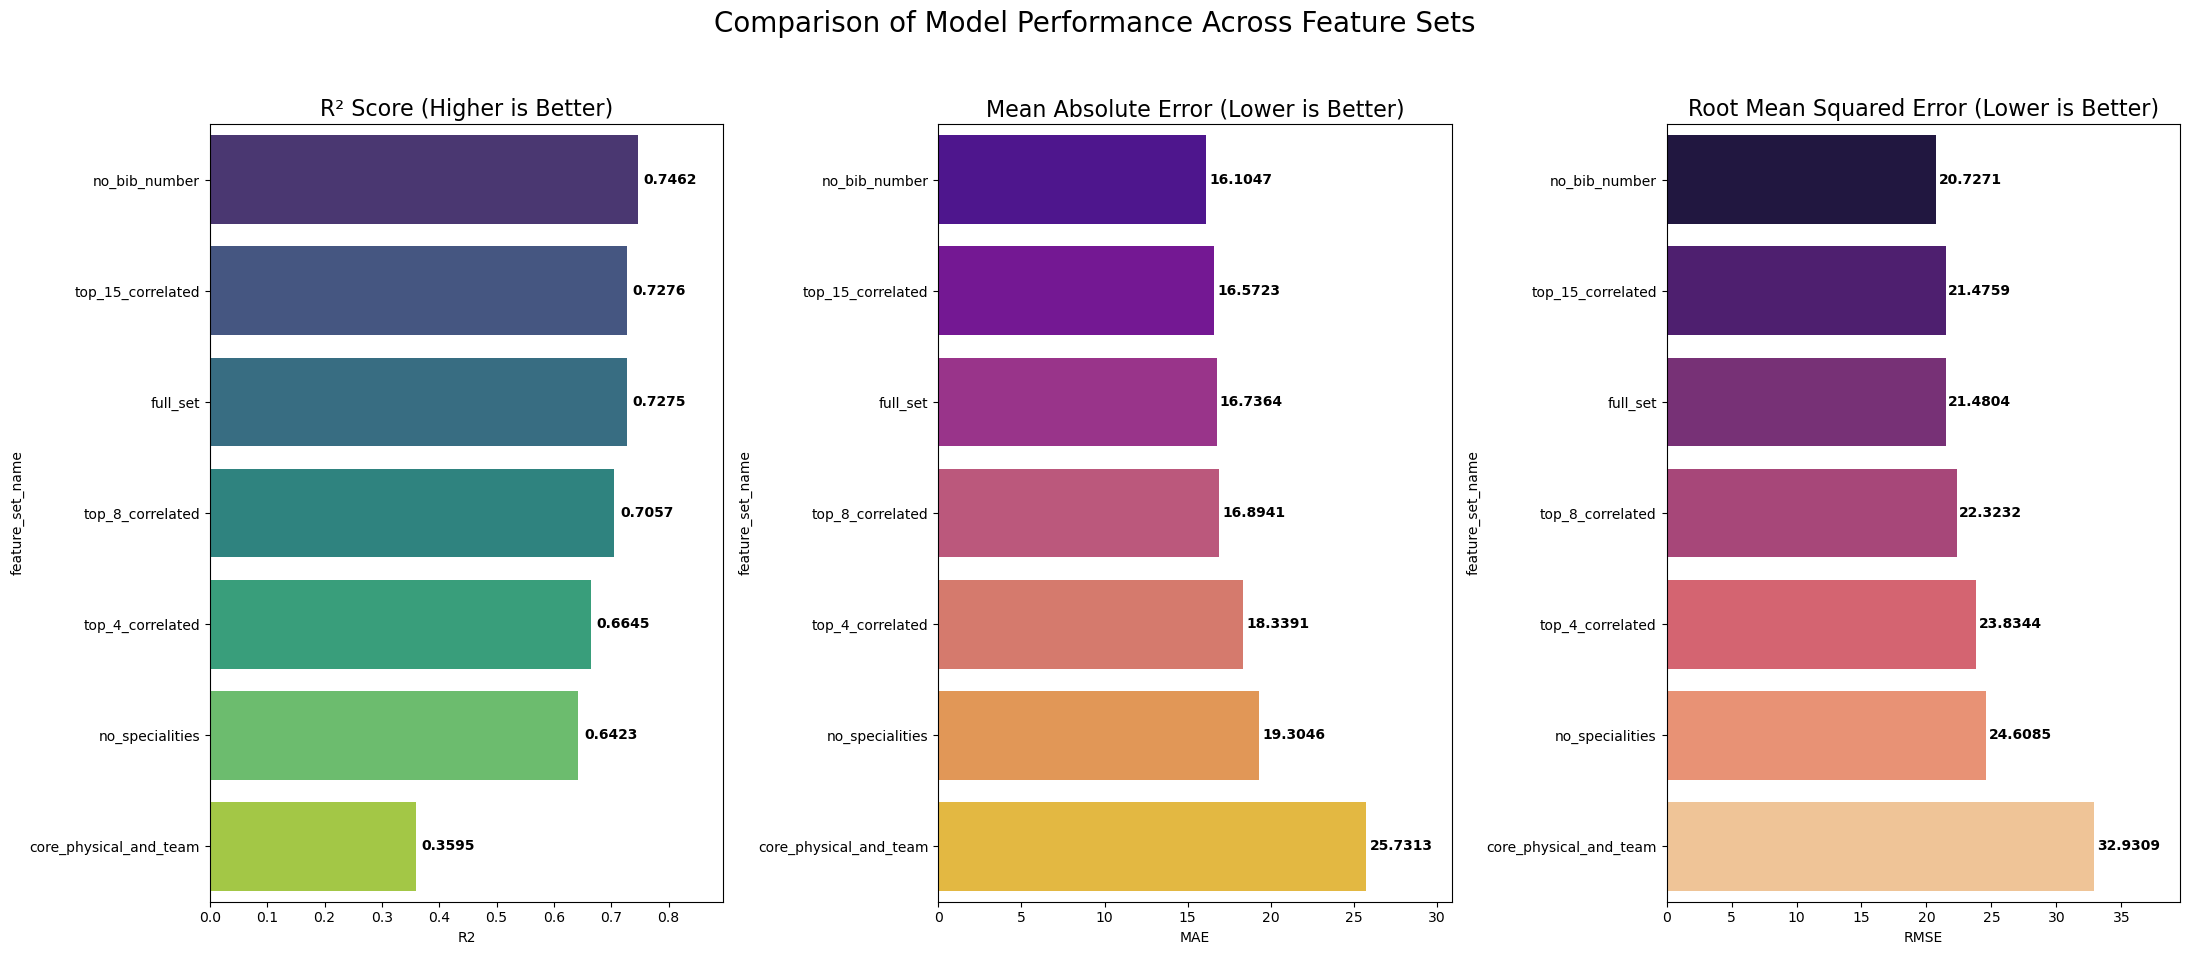

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assume your results_df is ready
# ...

# --- Corrected Visualization Code ---

# Create a figure with 3 subplots arranged in a single row
fig, axes = plt.subplots(1, 3, figsize=(22, 10))
fig.suptitle('Comparison of Model Performance Across Feature Sets', fontsize=20)

# --- Plot 1: R-squared (Higher is better) ---
df_sorted_r2 = results_df.sort_values(by='R2', ascending=False)
sns.barplot(
    ax=axes[0],
    x='R2',
    y='feature_set_name',
    data=df_sorted_r2,
    palette='viridis',
    hue='feature_set_name',  # FIX 1: Assign y-variable to hue
    legend=False             # FIX 1: Disable the legend
)
axes[0].set_title('R² Score (Higher is Better)', fontsize=16)
# FIX 2: Extend x-axis limit to give labels more space
axes[0].set_xlim([0, max(results_df['R2']) * 1.2])
for i, v in enumerate(df_sorted_r2['R2']):
    axes[0].text(v + 0.01, i, f"{v:.4f}", va='center', fontweight='bold')


# --- Plot 2: MAE (Lower is better) ---
df_sorted_mae = results_df.sort_values(by='MAE', ascending=True)
sns.barplot(
    ax=axes[1],
    x='MAE',
    y='feature_set_name',
    data=df_sorted_mae,
    palette='plasma',
    hue='feature_set_name', # FIX 1: Assign y-variable to hue
    legend=False            # FIX 1: Disable the legend
)
axes[1].set_title('Mean Absolute Error (Lower is Better)', fontsize=16)
# FIX 2: Extend x-axis limit to give labels more space
axes[1].set_xlim([0, max(results_df['MAE']) * 1.2])
for i, v in enumerate(df_sorted_mae['MAE']):
    axes[1].text(v + 0.2, i, f"{v:.4f}", va='center', fontweight='bold')


# --- Plot 3: RMSE (Lower is better) ---
df_sorted_rmse = results_df.sort_values(by='RMSE', ascending=True)
sns.barplot(
    ax=axes[2],
    x='RMSE',
    y='feature_set_name',
    data=df_sorted_rmse,
    palette='magma',
    hue='feature_set_name', # FIX 1: Assign y-variable to hue
    legend=False            # FIX 1: Disable the legend
)
axes[2].set_title('Root Mean Squared Error (Lower is Better)', fontsize=16)
# FIX 2: Extend x-axis limit to give labels more space
axes[2].set_xlim([0, max(results_df['RMSE']) * 1.2])
for i, v in enumerate(df_sorted_rmse['RMSE']):
    axes[2].text(v + 0.2, i, f"{v:.4f}", va='center', fontweight='bold')


# Clean up the layout and display the plot
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [20]:
# Hyperparameter tuning with GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# 1. Select the features from your best-performing set
best_features = feature_sets['no_bib_number']
X_train_best = X_train[best_features]
X_test_best = X_test[best_features]

# 2. Scale the data (as before)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_best)
X_test_scaled = scaler.transform(X_test_best)

# 3. Define the grid of hyperparameters to search
param_dist = {
    'n_estimators': randint(100, 500),         # Number of trees in the forest
    'max_depth': randint(10, 100),              # Maximum depth of the tree
    'min_samples_split': randint(2, 20),      # Minimum number of samples required to split a node
    'min_samples_leaf': randint(1, 20),       # Minimum number of samples required at a leaf node
    'max_features': ['sqrt', 'log2', 1.0]     # Number of features to consider at every split
}

# 4. Set up the Randomized Search
rf = RandomForestRegressor(random_state=42)
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=50,  # Number of parameter settings that are sampled. 50 is a good start.
    cv=5,       # 5-fold cross-validation
    random_state=42,
    n_jobs=-1,  # Use all available cores
    scoring='r2' # We want to maximize R-squared
)

# 5. Fit the random search to the data
print("Starting hyperparameter tuning for Random Forest...")
random_search.fit(X_train_scaled, y_train)

# 6. Get the best model and evaluate it
print(f"Best Hyperparameters: {random_search.best_params_}")
best_rf_model = random_search.best_estimator_
y_pred_tuned = best_rf_model.predict(X_test_scaled)

# 7. Print the tuned model's performance
r2_tuned = r2_score(y_test, y_pred_tuned)
mae_tuned = mean_absolute_error(y_test, y_pred_tuned)
rmse_tuned = root_mean_squared_error(y_test, y_pred_tuned)

print("\n--- Tuned Random Forest Performance ---")
print(f"R2: {r2_tuned:.6f}")
print(f"MAE: {mae_tuned:.6f}")
print(f"RMSE: {rmse_tuned:.6f}")

Starting hyperparameter tuning for Random Forest...
Best Hyperparameters: {'max_depth': 80, 'max_features': 1.0, 'min_samples_leaf': 19, 'min_samples_split': 3, 'n_estimators': 269}

--- Tuned Random Forest Performance ---
R2: 0.695111
MAE: 17.997554
RMSE: 22.719667


In [21]:
# Testing XGBoost
import xgboost as xgb

# 1. Use the same scaled data from your best feature set
# X_train_scaled and X_test_scaled are already prepared from the code above

# 2. Initialize and train a baseline XGBoost model
# We'll start with default settings
xgb_model = xgb.XGBRegressor(random_state=42, n_jobs=-1)

print("\n--- Testing baseline XGBoost model ---")
xgb_model.fit(X_train_scaled, y_train)

# 3. Make predictions and evaluate
y_pred_xgb = xgb_model.predict(X_test_scaled)
r2_xgb = r2_score(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = root_mean_squared_error(y_test, y_pred_xgb)

print("\n--- Baseline XGBoost Performance ---")
print(f"R2: {r2_xgb:.6f}")
print(f"MAE: {mae_xgb:.6f}")
print(f"RMSE: {rmse_xgb:.6f}")


--- Testing baseline XGBoost model ---

--- Baseline XGBoost Performance ---
R2: 0.687950
MAE: 17.412229
RMSE: 22.984912


In [22]:
# Load your original raw data to get historical context
df_raw = pd.read_csv(r'C:\Users\raclo\Documents\Bootcamp\tour-de-france-project\data\TDF_full_ranking_2014_2024_encoded.csv')

In [23]:
df_raw.head()

,year_edition,rider_name,team,bib_number,nationality,birthdate,height,weight,speciality_one_day_races,speciality_gc,...,speciality_sprint_cat,speciality_time_trial_cat,speciality_one_day_races_cat,speciality_hills_cat,speciality_gc_cat_num,speciality_climber_cat_num,speciality_time_trial_cat_num,age_group,age_group_adj,rank_group
0,2014,EISEL Bernhard,Team Sky (WT),2,AT,1981-2-17,1.83,74.0,2277,1126,...,High,Medium,High,Medium,1,0,1,"(30, 35]","(30, 35]",Below 10
1,2014,KIRYIENKA Vasil,Team Sky (WT),3,BY,1981-6-28,1.82,69.0,506,1537,...,Low,High,Low,Medium,1,1,2,"(30, 35]","(30, 35]",Below 10
2,2014,LÓPEZ David,Team Sky (WT),4,ES,1981-5-13,1.79,68.0,659,2028,...,Low,Medium,Low,Medium,2,1,1,"(30, 35]","(30, 35]",Below 10
3,2014,NIEVE Mikel,Team Sky (WT),5,ES,1984-5-26,1.73,62.0,811,3608,...,Low,Low,Medium,Medium,2,2,0,"(25, 30]","(25, 30]",Below 10
4,2014,PATE Danny,Team Sky (WT),6,US,1979-3-24,1.85,73.0,392,602,...,Low,High,Low,Low,0,0,2,"(30, 35]","(30, 35]",Below 10


In [24]:
# Load 2025 Tour de France participants data
df_2025 = pd.read_csv(r'C:\Users\raclo\Documents\Bootcamp\tour-de-france-project\notebooks\tdf_2025_startlist_full_details.csv')
# Display the first few rows of the dataframe
df_2025.head()

,name,rider_url,team,team_url,bib_number,nationality,birthdate,place_of_birth,height,weight,pcs_rank,uci_world_rank,one_day_races,gc,time_trial,sprint,climber,hills
0,CARAPAZ Richard,richard-carapaz,EF Education - EasyPost (WT),team/ef-education-easypost-2025,NaN,EC,1993-5-29,El Carmelo,1.70,62.0,NaN,NaN,1262,4060,551,88,4822,1735
1,SWEENY Harry,harry-sweeny,EF Education - EasyPost (WT),team/ef-education-easypost-2025,NaN,AU,1998-7-9,Warwick,1.86,75.0,NaN,NaN,177,228,159,63,107,251
2,POWLESS Neilson,neilson-powless,EF Education - EasyPost (WT),team/ef-education-easypost-2025,NaN,US,1996-9-3,Eglin,1.83,67.0,NaN,NaN,2607,1569,891,238,1678,1109
3,HEALY Ben,ben-healy,EF Education - EasyPost (WT),team/ef-education-easypost-2025,NaN,IE,2000-9-11,Kingswinford,1.75,65.0,NaN,NaN,1284,504,470,40,957,480
4,POGAČAR Tadej,tadej-pogacar,UAE Team Emirates - XRG (WT),team/uae-team-emirates-xrg-2025,NaN,SI,1998-9-21,Klanec,1.76,66.0,NaN,NaN,7677,6844,2703,194,8498,3706


In [25]:
# For df_2025 add the year_edition column
df_2025['year_edition'] = 2025

In [26]:
# Calculate the age of each rider in 2025
from datetime import datetime
df_2025['age'] = 2025 - pd.to_datetime(df_2025['birthdate']).dt.year

In [27]:
# Calculate BMI for each rider in 2025
df_2025['bmi'] = df_2025['weight'] / (df_2025['height'] ** 2)

In [28]:
# Drop unnecessary columns
df_2025 = df_2025.drop(columns=['rider_url', 'team_url', 'place_of_birth', 'pcs_rank', 'uci_world_rank'])

In [31]:
# Rename columns to match the model's expected input
df_2025 = df_2025.rename(columns={
    'one_day_races': 'speciality_one_day_races',
    'gc': 'speciality_gc',
    'time_trial': 'speciality_time_trial',
    'sprint': 'speciality_sprint',
    'climber': 'speciality_climber',
    'hills': 'speciality_hills',
    'name': 'rider_name'
})

In [32]:
# Full feature engineering for df_2025
# --- Initial Feature Creation ---
df_2025['year_edition'] = 2025
df_2025['age'] = 2025 - pd.to_datetime(df_2025['birthdate']).dt.year
df_2025['bmi'] = df_2025['weight'] / (df_2025['height'] ** 2)

# --- Experience Feature ---
# Find the first year each rider appeared in the historical data
first_year_map = df_raw.groupby('rider_name')['year_edition'].min()
# Map this to the 2025 riders. If a rider is new (not in map), their first year is 2025.
df_2025['first_year'] = df_2025['rider_name'].map(first_year_map).fillna(2025)
df_2025['experience'] = df_2025['year_edition'] - df_2025['first_year']


# --- Lagged Team Median Rank Feature ---
# Calculate the median rank for each team in 2024 (the last historical year)
team_rank_2024 = df_raw[df_raw['year_edition'] == 2024].groupby('team')['rank'].median()
# Map this to the 2025 riders based on their team
df_2025['team_median_rank_last_year'] = df_2025['team'].map(team_rank_2024)
# For new teams not in the 2024 data, fill with the overall median from 2024
df_2025['team_median_rank_last_year'].fillna(team_rank_2024.median(), inplace=True)


# --- Nationality Grouping Feature ---
top_countries = ['FR', 'ES', 'BE', 'NL', 'IT', 'CO', 'SI', 'DK', 'DE', 'GB', 'US']
region_map = {
    'PT': 'Southern Europe', 'BY': 'Eastern Europe', 'CH': 'Western Europe',
    'PL': 'Eastern Europe', 'AU': 'Oceania', 'EC': 'South America', 'AT': 'Central Europe',
    'LU': 'Western Europe', 'KZ': 'Central Asia', 'EE': 'Baltic', 'IE': 'Western Europe',
    'CA': 'North America', 'CZ': 'Central Europe', 'SK': 'Central Europe', 'NO': 'Nordic',
    'ER': 'Africa', 'ZA': 'Africa', 'CR': 'Central America', 'ET': 'Africa', 'HR': 'Balkan',
    'JP': 'Asia', 'LV': 'Baltic', 'NZ': 'Oceania', 'IL': 'Middle East', 'AR': 'South America',
    'LT': 'Baltic', 'RU': 'Eastern Europe', 'SE': 'Nordic', 'CN': 'Asia'
}
conditions = [
    df_2025['nationality'].isin(top_countries),
    df_2025['nationality'].isin(region_map.keys())
]
choices = [df_2025['nationality'], df_2025['nationality'].map(region_map)]
df_2025['nationality_group'] = np.select(conditions, choices, default='Other')
nationality_dummies_2025 = pd.get_dummies(df_2025['nationality_group'], prefix='nat', dtype=int)
df_2025 = pd.concat([df_2025, nationality_dummies_2025], axis=1)


# --- Final Preparation for Prediction ---

# 1. Select the feature list from your best model ('no_bib_number')
# We use X_train from your previous run to get the exact column list
best_features = feature_sets['no_bib_number']
X_train_best_cols = X_train[best_features].columns

# 2. Ensure the 2025 DataFrame has the exact same columns in the same order
# Use .reindex() to align columns, filling any missing ones with 0 (e.g., a nationality not in 2025)
df_2025_features = df_2025.reindex(columns=X_train_best_cols, fill_value=0)

print("2025 data prepared for prediction.")
print("Shape of prediction data:", df_2025_features.shape)

2025 data prepared for prediction.
Shape of prediction data: (117, 39)


C:\Users\raclo\AppData\Local\Temp\ipykernel_8576\3963113514.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_2025['team_median_rank_last_year'].fillna(team_rank_2024.median(), inplace=True)


In [33]:
# Scale date and make predictions
# The scaler and model should already be trained and in your notebook's memory
# scaler: The StandardScaler fit on your X_train data
# best_rf_model: Your best trained RandomForestRegressor model

# 1. Scale the 2025 features using the already-fitted scaler
X_2025_scaled = scaler.transform(df_2025_features)

# 2. Make the predictions
predictions_2025 = best_rf_model.predict(X_2025_scaled)

# 3. Add the predictions to your 2025 DataFrame
df_2025['predicted_rank'] = predictions_2025

In [34]:
# Review 2025 predictions
# Select relevant columns and sort by the predicted rank
final_ranking_2025 = df_2025[['rider_name', 'team', 'age', 'predicted_rank']].sort_values(by='predicted_rank')

# Assign a predicted position for clarity
final_ranking_2025['predicted_position'] = range(1, len(final_ranking_2025) + 1)

print("\n--- Predicted 2025 Tour de France General Classification ---")
print(final_ranking_2025.head(20)) # Display the predicted top 20


--- Predicted 2025 Tour de France General Classification ---
             rider_name                              team  age  \
4         POGAČAR Tadej      UAE Team Emirates - XRG (WT)   27   
41     VINGEGAARD Jonas    Team Visma | Lease a Bike (WT)   29   
6            YATES Adam      UAE Team Emirates - XRG (WT)   33   
5          ALMEIDA João      UAE Team Emirates - XRG (WT)   27   
68          GAUDU David               Groupama - FDJ (WT)   29   
69     MARTIN Guillaume               Groupama - FDJ (WT)   32   
74            MAS Enric                Movistar Team (WT)   30   
14        ROGLIČ Primož  Red Bull - BORA - hansgrohe (WT)   36   
32     BUCHMANN Emanuel                      Cofidis (WT)   33   
43            KUSS Sepp    Team Visma | Lease a Bike (WT)   31   
20      EVENEPOEL Remco            Soudal Quick-Step (WT)   25   
40          YATES Simon    Team Visma | Lease a Bike (WT)   33   
16     VLASOV Aleksandr  Red Bull - BORA - hansgrohe (WT)   29   
83         O'C

In [43]:
final_ranking_2025.head()

,rider_name,team,age,predicted_rank,predicted_position
4,POGAČAR Tadej,UAE Team Emirates - XRG (WT),27,13.916354,1
41,VINGEGAARD Jonas,Team Visma | Lease a Bike (WT),29,14.727362,2
6,YATES Adam,UAE Team Emirates - XRG (WT),33,15.277802,3
5,ALMEIDA João,UAE Team Emirates - XRG (WT),27,16.978440,4
68,GAUDU David,Groupama - FDJ (WT),29,17.219819,5


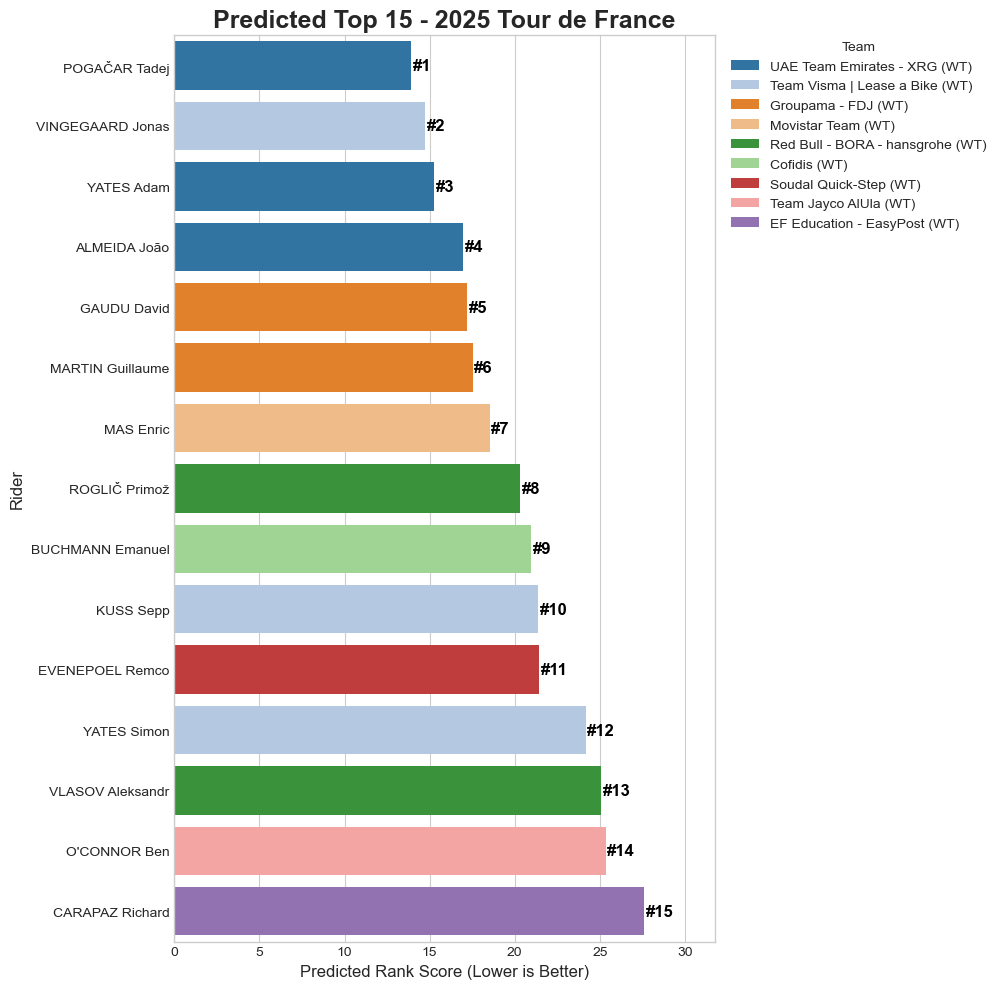

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Use the final_ranking_2025 DataFrame you already created
# Let's select the Top 15 for the plot
top_15_predictions = final_ranking_2025.head(15)

# Create the plot
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(12, 10))

# Create the horizontal bar plot, coloring bars by team
ax = sns.barplot(
    x='predicted_rank',
    y='rider_name',
    data=top_15_predictions,
    hue='team',
    dodge=False,
    palette='tab20'
)


# --- NEW, MORE ROBUST ANNOTATION LOOP ---
# Instead of iterating through plot patches, we iterate directly through the dataframe rows.
# This prevents the IndexError when 'hue' is used.
for i, row in enumerate(top_15_predictions.itertuples()):
    # 'i' is the y-coordinate for the bar (0 for the top bar, 1 for the second, etc.)
    # 'row.predicted_rank' is the x-coordinate (the width of the bar)
    # 'row.predicted_position' is the text we want to display
    ax.text(
        row.predicted_rank + 0.1,    # Position the text slightly to the right of the bar
        i,                           # The y-coordinate of the bar's center
        f'#{row.predicted_position}', # The text to display (e.g., '#1')
        ha='left',                   # Horizontal alignment
        va='center',                 # Vertical alignment
        fontsize=12,
        fontweight='bold',
        color='black'
    )


# Improve layout and labels
ax.set_title('Predicted Top 15 - 2025 Tour de France', fontsize=18, fontweight='bold')
ax.set_xlabel('Predicted Rank Score (Lower is Better)', fontsize=12)
ax.set_ylabel('Rider', fontsize=12)

# Adjust the x-axis limit to make sure the new labels fit
ax.set_xlim(right=max(top_15_predictions['predicted_rank']) * 1.15)

# Move the legend outside of the plot area
ax.legend(
    bbox_to_anchor=(1.02, 1),
    loc='upper left',
    borderaxespad=0,
    title='Team'
)

plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

In [44]:
# Prepare dataframe for analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Let's recreate the full analysis dataframe for clarity
# Assumes 'df_2025' has all original columns and 'final_ranking_2025' has the prediction data
analysis_df = pd.merge(
    df_2025,
    final_ranking_2025[['rider_name', 'predicted_rank', 'predicted_position']],
    on='rider_name'
)

In [47]:
final_ranking_2025

,rider_name,team,age,predicted_rank,predicted_position
4,POGAČAR Tadej,UAE Team Emirates - XRG (WT),27,13.916354,1
41,VINGEGAARD Jonas,Team Visma | Lease a Bike (WT),29,14.727362,2
6,YATES Adam,UAE Team Emirates - XRG (WT),33,15.277802,3
5,ALMEIDA João,UAE Team Emirates - XRG (WT),27,16.978440,4
68,GAUDU David,Groupama - FDJ (WT),29,17.219819,5
...,...,...,...,...,...
93,BAUHAUS Phil,Bahrain - Victorious (WT),31,114.882792,113
63,THEUNS Edward,Lidl - Trek (WT),34,116.078253,114
22,VAN LERBERGHE Bert,Soudal Quick-Step (WT),33,116.545668,115
21,MERLIER Tim,Soudal Quick-Step (WT),33,118.162664,116


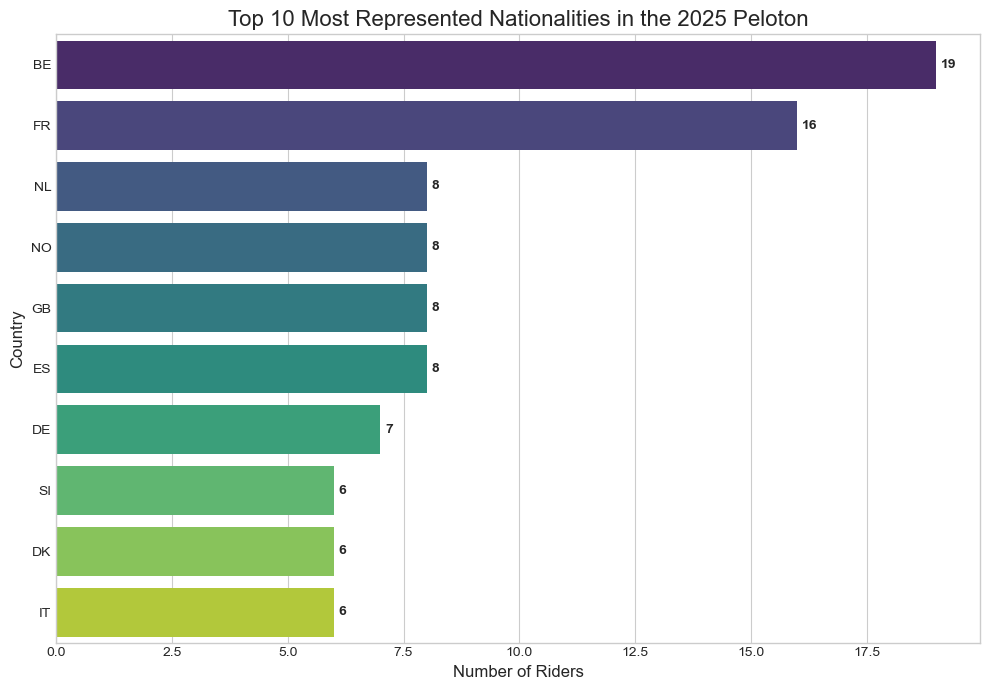

In [45]:
# Most represented nationalities among predicted winners
# Count riders per nationality
nationality_counts = analysis_df['nationality'].value_counts()

# Plot the top 10
plt.figure(figsize=(10, 7))
ax = sns.barplot(
    x=nationality_counts.head(10).values,
    y=nationality_counts.head(10).index,
    palette='viridis',
    hue=nationality_counts.head(10).index,
    legend=False
)

ax.set_title('Top 10 Most Represented Nationalities in the 2025 Peloton', fontsize=16)
ax.set_xlabel('Number of Riders', fontsize=12)
ax.set_ylabel('Country', fontsize=12)

# Add count labels to the bars
for i, v in enumerate(nationality_counts.head(10).values):
    ax.text(v + 0.1, i, str(v), va='center', fontweight='bold')

plt.tight_layout()
plt.show()

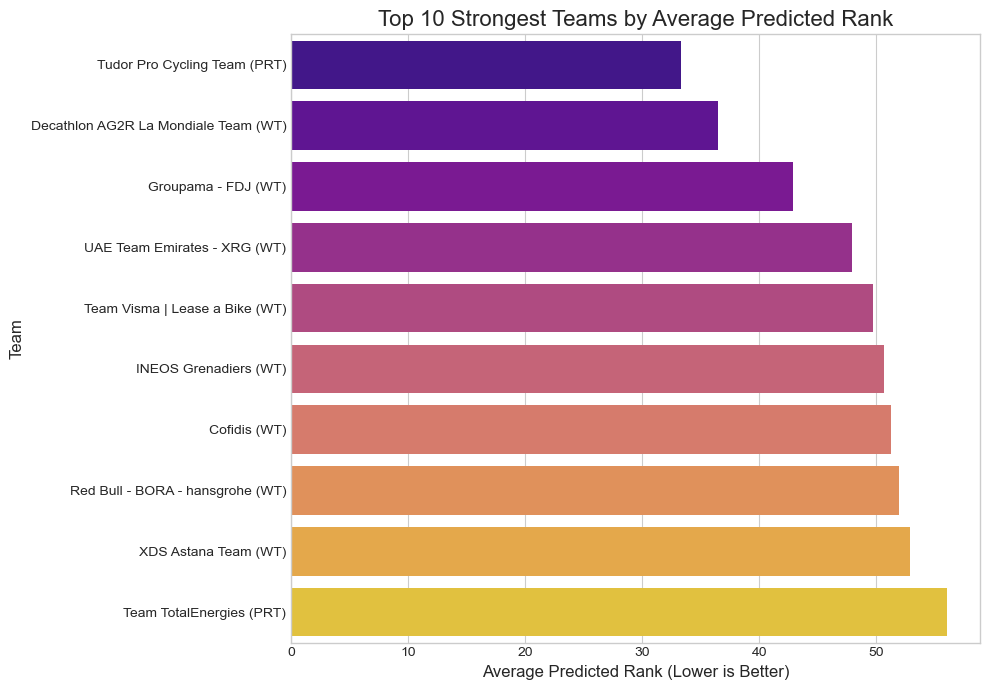

In [49]:
# Team strength by average predicted rank
# Use final_ranking_2025, which contains 'team' and 'predicted_rank'
team_strength = final_ranking_2025.groupby('team')['predicted_rank'].mean().sort_values(ascending=True)

# Plot the top 10 strongest teams
plt.figure(figsize=(10, 7))
ax = sns.barplot(
    x=team_strength.head(10).values,
    y=team_strength.head(10).index,
    palette='plasma',
    hue=team_strength.head(10).index,
    legend=False
)

ax.set_title('Top 10 Strongest Teams by Average Predicted Rank', fontsize=16)
ax.set_xlabel('Average Predicted Rank (Lower is Better)', fontsize=12)
ax.set_ylabel('Team', fontsize=12)

# Invert x-axis to show lower rank as a longer bar (optional, for visual impact)
# ax.set_xlim(left=team_strength.head(10).max(), right=team_strength.head(10).min())

plt.tight_layout()
plt.show()


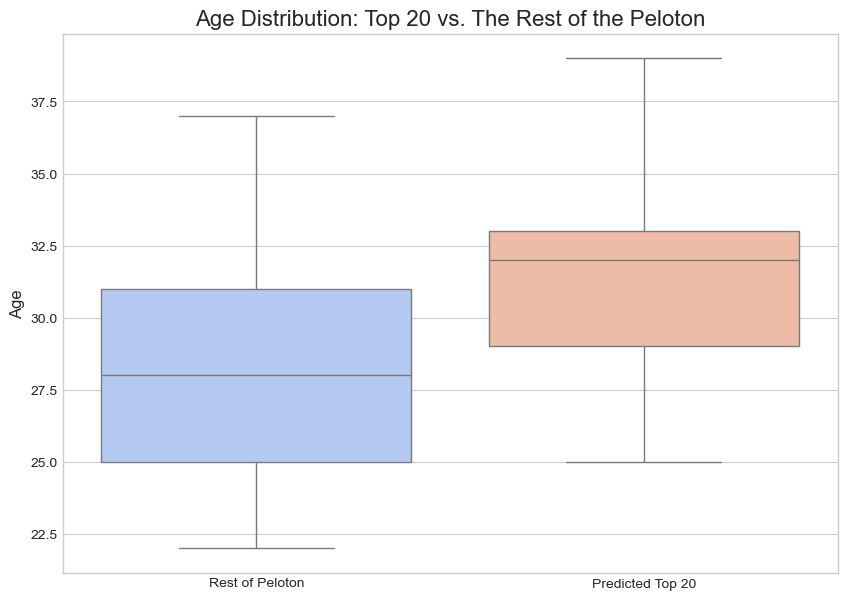

Average age of predicted Top 20: 31.7 years
Average age of the rest of the peloton: 28.5 years


In [52]:
# Age distribution
# Create a flag for top contenders
analysis_df['is_top_20'] = analysis_df['predicted_position'] <= 20

# Create a box plot to compare age distributions
plt.figure(figsize=(10, 7))
sns.boxplot(
    x='is_top_20',
    y='age',
    hue='is_top_20',
    legend=False,
    data=analysis_df,
    palette='coolwarm'
)
plt.title('Age Distribution: Top 20 vs. The Rest of the Peloton', fontsize=16)
plt.xlabel('', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Rest of Peloton', 'Predicted Top 20'])
plt.show()

# Print the exact average ages
avg_age_top20 = analysis_df[analysis_df['is_top_20']]['age'].mean()
avg_age_rest = analysis_df[~analysis_df['is_top_20']]['age'].mean()
print(f"Average age of predicted Top 20: {avg_age_top20:.1f} years")
print(f"Average age of the rest of the peloton: {avg_age_rest:.1f} years")

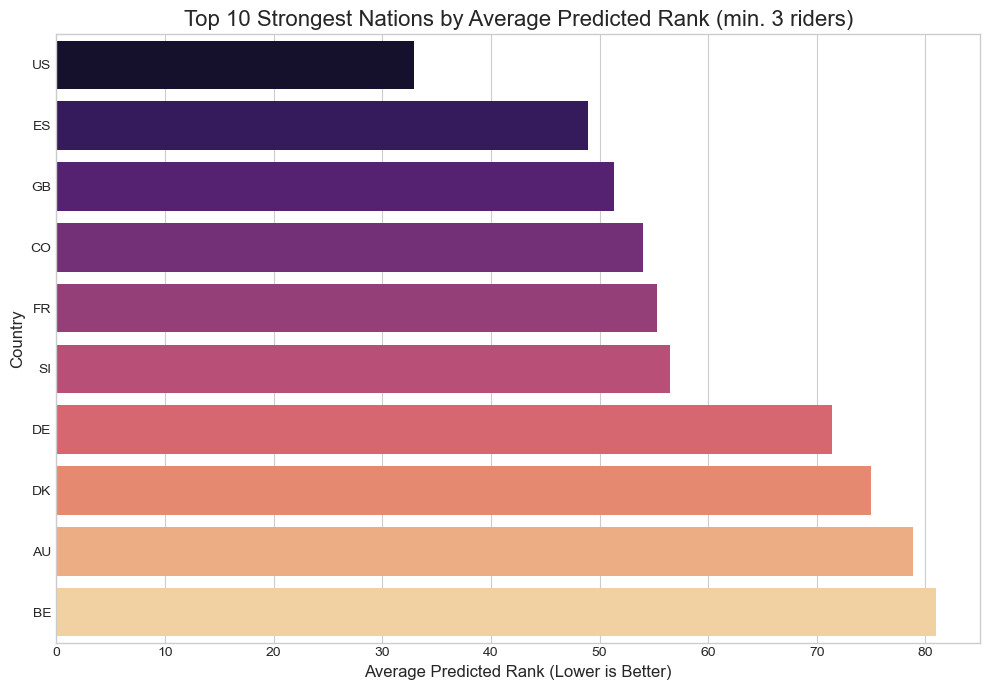

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- FIX: Prepare the DataFrames cleanly before merging ---

# 1. Prepare the LEFT DataFrame (df_2025)
# Ensure it has the necessary columns, but drop any old 'predicted_rank' column to avoid conflicts.
left_df = df_2025[['rider_name', 'nationality']].copy()
# Clean the key for a robust merge
left_df['rider_name'] = left_df['rider_name'].str.strip()


# 2. Prepare the RIGHT DataFrame (final_ranking_2025)
# Take only the columns we need: the key and the value we want to add.
right_df = final_ranking_2025[['rider_name', 'predicted_rank']].copy()
# Clean the key for a robust merge
right_df['rider_name'] = right_df['rider_name'].str.strip()


# 3. Perform the merge. There are no more conflicting column names.
analysis_df = pd.merge(
    left_df,
    right_df,
    on='rider_name',
    how='left'
)


# --- Analysis Code (will now work correctly) ---

# First, get a list of countries with 3 or more riders
nation_counts = analysis_df['nationality'].value_counts()
nations_to_include = nation_counts[nation_counts >= 3].index

# Filter the dataframe to only include these nations
filtered_df = analysis_df[analysis_df['nationality'].isin(nations_to_include)]

# Calculate the average rank for this filtered group
# This line will now work because 'predicted_rank' exists and is named correctly.
national_strength = filtered_df.groupby('nationality')['predicted_rank'].mean().sort_values(ascending=True)

# Plot the top 10
plt.figure(figsize=(10, 7))
sns.barplot(
    x=national_strength.head(10).values,
    y=national_strength.head(10).index,
    palette='magma',
    hue=national_strength.head(10).index,
    legend=False
)
plt.title('Top 10 Strongest Nations by Average Predicted Rank (min. 3 riders)', fontsize=16)
plt.xlabel('Average Predicted Rank (Lower is Better)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.tight_layout()
plt.show()